# Decision Tree Classification Part 4

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AMD'
start = '2014-01-01'
end = '2019-01-01'

# Read data 
dataset = yf.download(symbol,start,end)

# View Columns
dataset.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,3.85,3.98,3.84,3.95,3.95,20548400
2014-01-03,3.98,4.00,3.88,4.00,4.00,22887200
2014-01-06,4.01,4.18,3.99,4.13,4.13,42398300
2014-01-07,4.19,4.25,4.11,4.18,4.18,42932100
2014-01-08,4.23,4.26,4.14,4.18,4.18,30678700


In [3]:
dataset['Open_Close'] = (dataset['Open'] - dataset['Adj Close'])/dataset['Open']
dataset['High_Low'] = (dataset['High'] - dataset['Low'])/dataset['Low']
dataset['Increase_Decrease'] = np.where(dataset['Volume'].shift(-1) > dataset['Volume'],1,0)
dataset['Buy_Sell_on_Open'] = np.where(dataset['Open'].shift(-1) > dataset['Open'],1,0)
dataset['Buy_Sell'] = np.where(dataset['Adj Close'].shift(-1) > dataset['Adj Close'],1,0)
dataset['Returns'] = dataset['Adj Close'].pct_change()
dataset = dataset.dropna()
dataset.head()

,Open,High,Low,Close,Adj Close,Volume,Open_Close,High_Low,Increase_Decrease,Buy_Sell_on_Open,Buy_Sell,Returns
Date,,,,,,,,,,,,
2014-01-03,3.98,4.00,3.88,4.00,4.00,22887200,-0.005025,0.030928,1,1,1,0.012658
2014-01-06,4.01,4.18,3.99,4.13,4.13,42398300,-0.029925,0.047619,1,1,1,0.032500
2014-01-07,4.19,4.25,4.11,4.18,4.18,42932100,0.002387,0.034063,0,1,0,0.012106
2014-01-08,4.23,4.26,4.14,4.18,4.18,30678700,0.011820,0.028986,0,0,0,0.000000
2014-01-09,4.20,4.23,4.05,4.09,4.09,30667600,0.026190,0.044444,0,0,1,-0.021531


In [4]:
X = dataset[['Open', 'High', 'Low', 'Volume', 'Adj Close','Returns']].values
y = dataset['Buy_Sell'].values

In [5]:
#Spilitting the dataset
removed =[0,50,100]
new_target = np.delete(y,removed)
new_data = np.delete(X,removed, axis=0) 

In [6]:
from sklearn import tree

clf = tree.DecisionTreeClassifier() 
clf=clf.fit(new_data,new_target) 
prediction = clf.predict(X[removed]) 

In [7]:
print("Original Labels",y[removed])
print("Labels Predicted",prediction)

Original Labels [1 1 0]
Labels Predicted [0 0 1]


[Text(140.35402310183943, 214.14545454545456, 'X[3] <= 21226350.0\ngini = 0.5\nsamples = 1254\nvalue = [630, 624]'),
 Text(51.2340112278464, 207.55636363636364, 'X[5] <= 0.061\ngini = 0.494\nsamples = 472\nvalue = [261, 211]'),
 Text(49.79555795179914, 200.96727272727273, 'X[3] <= 20462200.0\ngini = 0.493\nsamples = 467\nvalue = [261, 206]'),
 Text(46.91865139970462, 194.37818181818182, 'X[1] <= 1.725\ngini = 0.495\nsamples = 456\nvalue = [251, 205]'),
 Text(45.48019812365736, 187.7890909090909, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(48.35710467575188, 187.7890909090909, 'X[5] <= -0.039\ngini = 0.494\nsamples = 452\nvalue = [251, 201]'),
 Text(2.876906552094522, 181.2, 'X[0] <= 1.765\ngini = 0.444\nsamples = 24\nvalue = [8, 16]'),
 Text(1.438453276047261, 174.6109090909091, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(4.3153598281417835, 174.6109090909091, 'X[3] <= 7877050.0\ngini = 0.423\nsamples = 23\nvalue = [7, 16]'),
 Text(2.876906552094522, 168.0218181818182, 'gin

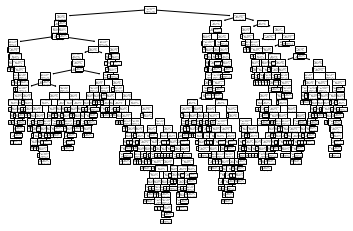

In [8]:
tree.plot_tree(clf) 